In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('data/telecom_churn.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [23]:
data.describe(include = 'all')
# include = 'all' -  показывает все признаки, не только числовые

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


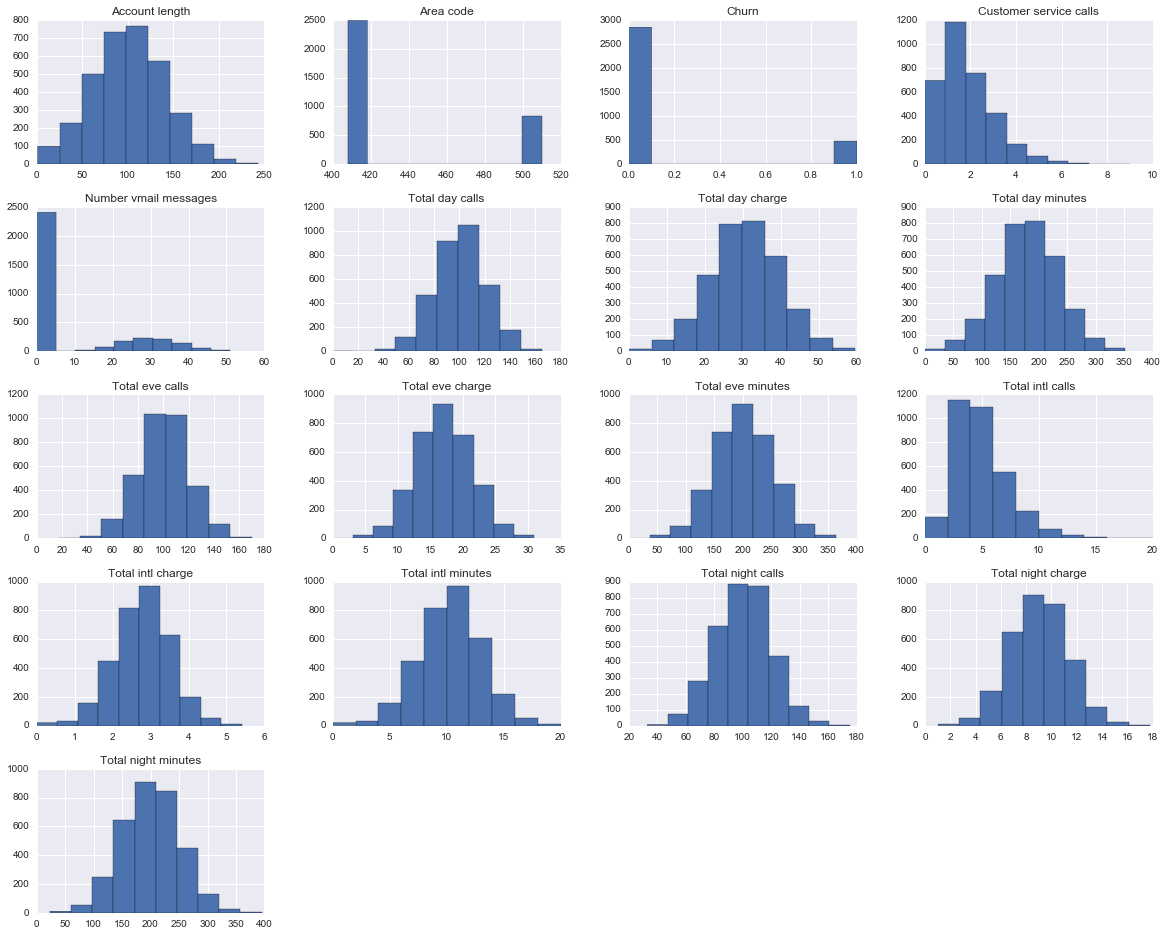

In [8]:
data.hist();
# если ставить ";" то мусора не будет после hist
figsize(20,16)

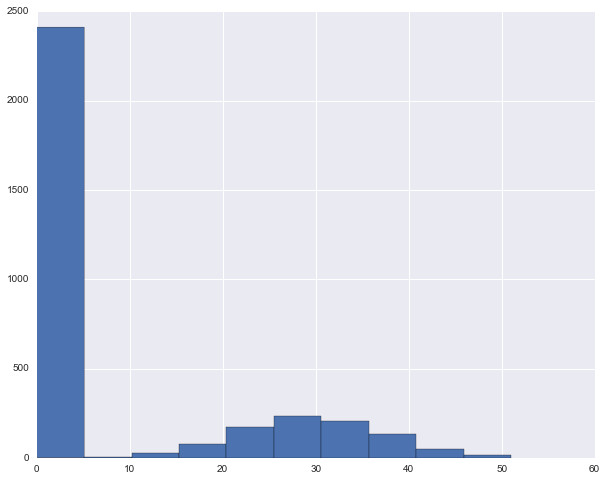

In [15]:
figsize = (6,4)
data['Number vmail messages'].hist();

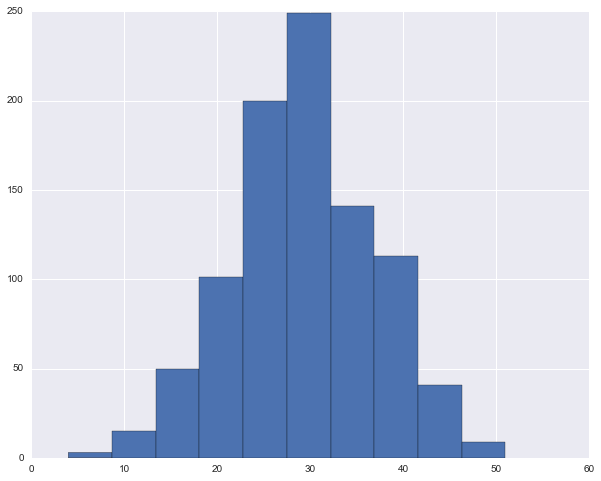

In [17]:
data[data['Number vmail messages']>0]['Number vmail messages'].hist();
#отобрали положительное значение признака

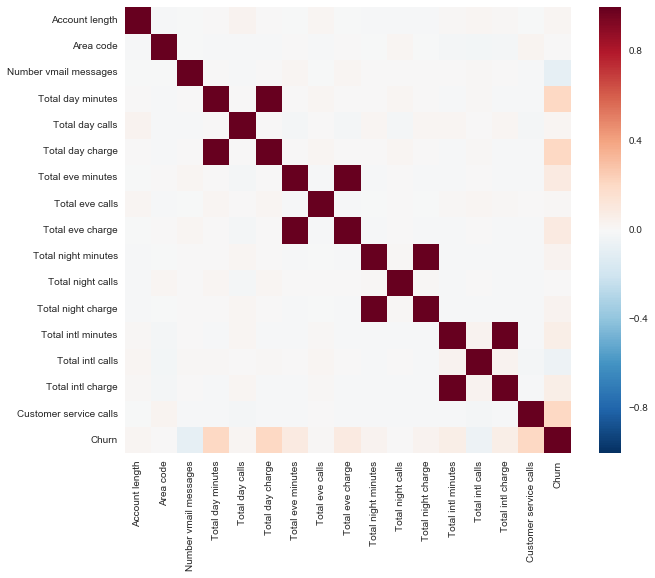

In [19]:
sns.heatmap(data.corr())

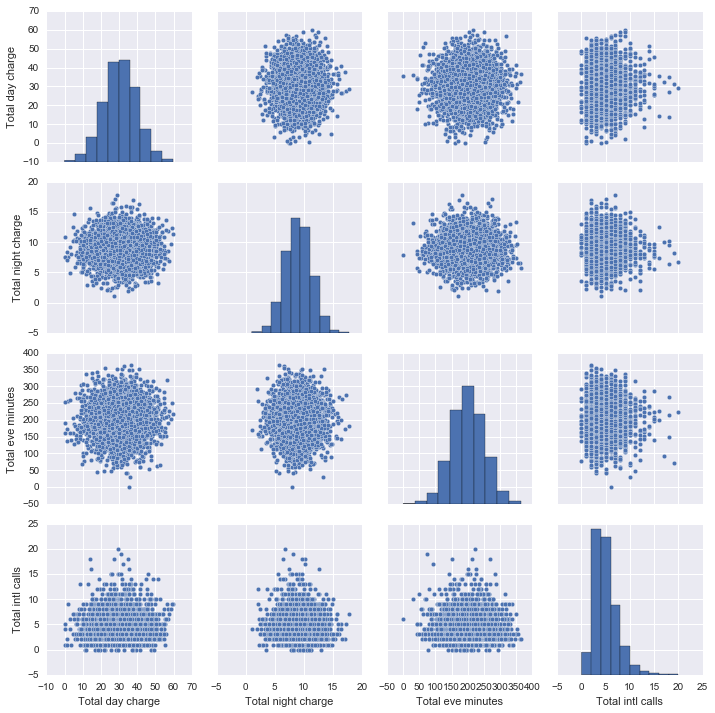

In [25]:
sns.pairplot(data[["Total day charge", "Total night charge", 'Total eve minutes', 'Total intl calls']])

In [26]:
data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
#483 ушедших клиентов - это очень много
# баланс классов - это очень важно, здесь перекос не сильный

In [27]:
pd.crosstab(data['International plan'], data["Churn"])

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


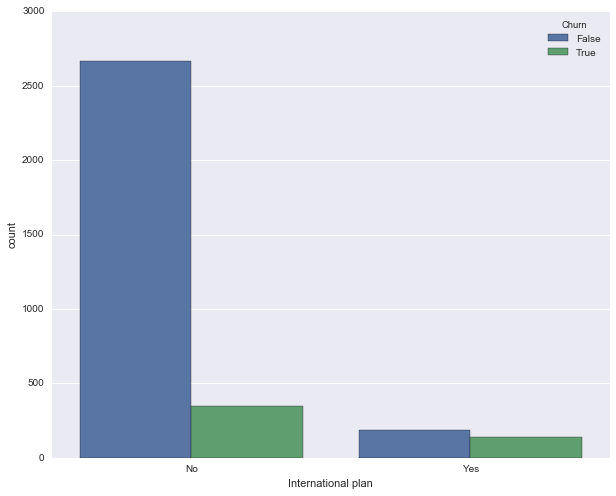

In [28]:
sns.countplot(x ='International plan', hue = 'Churn', data = data )

подчеркивает важность роуминга на отток

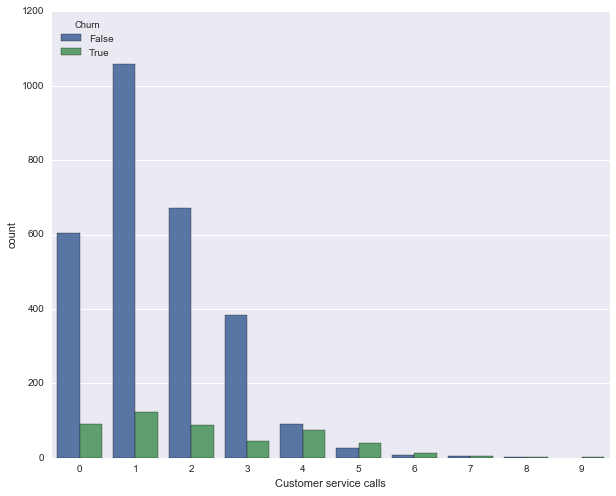

In [29]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = data)

тут чем больше было сделано сервисных звонков в колл-центр, тем ниже отток, значит при такой явной зависимости можно создать отдельный признак

In [33]:
data["Service many calls"] = (data['Customer service calls'>2].astype(int))

KeyError: True

## хорошо бы попроверять разные гипотезы на статистическую значимость

ttest -  только для количественных признаков

ztest - для комбинации (?), 2 вектора из нулей и единичек
например, отток для тех у кого есть роуминг и отток для тех у кого нет роуминга

In [36]:
import sys
sys.path.append("../module2_ML/scripts/")
from yandex_mipt_stat_tests import proportions_diff_z_test, proportions_diff_z_stat_ind

In [38]:
churn_with_roaming = data[data["International plan"] == "Yes"]["Churn"]
churn_no_roaming = data[data["International plan"] == "No"]["Churn"]

In [43]:
z_stat = proportions_diff_z_stat_ind(churn_with_roaming,churn_no_roaming)

z статистику получили и теперь запихиваем в след фцию

In [44]:
proportions_diff_z_test (z_stat, alternative='greater')

0.0

Ho отвергаем, тк вероятность наблюдать такое событие при справедливости Но очень мала

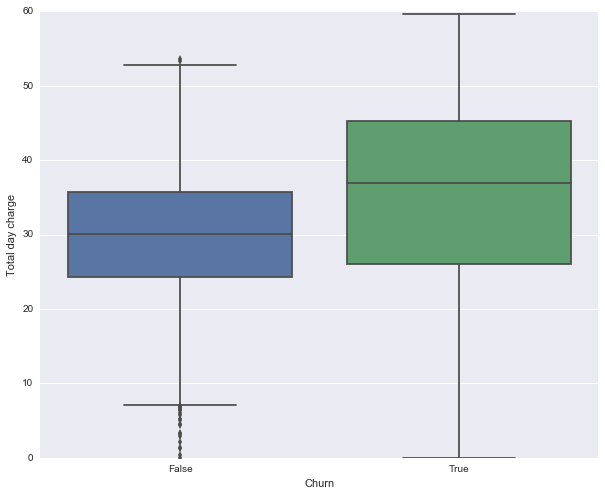

In [46]:
sns.boxplot(x = "Churn", y = "Total day charge", data = data)

тут вывод, что чем больше счет выставляют, тот быстрее уйдет

In [47]:
from scipy.stats import ttest_ind

In [51]:
ttest_ind(data[data["Churn" == True]["Total day charge"].std(), data[data["Churn" == False]["Total day charge"].std())

SyntaxError: invalid syntax (<ipython-input-51-04095e9e319b>, line 1)